In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML2_lib import loss
from ML2_lib import plot_set
from ML2_lib import RV_SGDAve

In [30]:
d = 2
trial_num = 100
lr = 0.01
noise = "lognormal"
c = 1
E_var = 1.75
n = 10000
k_list = [1, 2, 4, 5, 10, 20]
son = loss.Ellipsoid(d=d, noise_type=noise, E_var=E_var)

In [31]:
def sgd_to_ave(x):
    hoge = []
    for i in range(x.shape[0]):
        if i == 0:
            hoge.append(x[0])
        else:
            hoge.append(np.mean(x[0:i+1],axis=0))
    return hoge

In [32]:
def k_sgd_to_ave(k_core_list):
    hoge = []
    for i in k_core_list:
        fuga = []
        for j in i:
            fuga.append(sgd_to_ave(j))
        hoge.append(np.array(fuga))
    return hoge

(1, 2)
valid_loss_store [0.0490099901445553]
tmp_loss [array([0.04900999])]
0
(2, 2)
valid_loss_store [2.972852214820693, 2.8400340238791686]
tmp_loss [array([2.84003402]), array([2.84003402])]
1
(4, 2)
valid_loss_store [8.28663197835172, 8.216950871980302, 9.112328418061786, 7.792144180928316]
tmp_loss [array([7.79214418]), array([7.79214418]), array([7.79214418]), array([7.79214418])]
3
(5, 2)
valid_loss_store [18.711880898129905, 17.842241203912714, 18.680617154167567, 17.863541844860247, 17.835230887498057]
tmp_loss [array([17.83523089]), array([17.83523089]), array([17.83523089]), array([17.83523089]), array([17.83523089])]
4
(10, 2)
valid_loss_store [6.548819003685943, 6.88443894813149, 5.557932905465729, 6.528826017215963, 5.565361922253963, 4.539686398262318, 6.557038580325177, 6.531456477695477, 6.53484687780704, 5.695712117110001]
tmp_loss [array([5.69571212]), array([5.69571212]), array([5.69571212]), array([5.69571212]), array([5.69571212]), array([5.69571212]), array([5.69

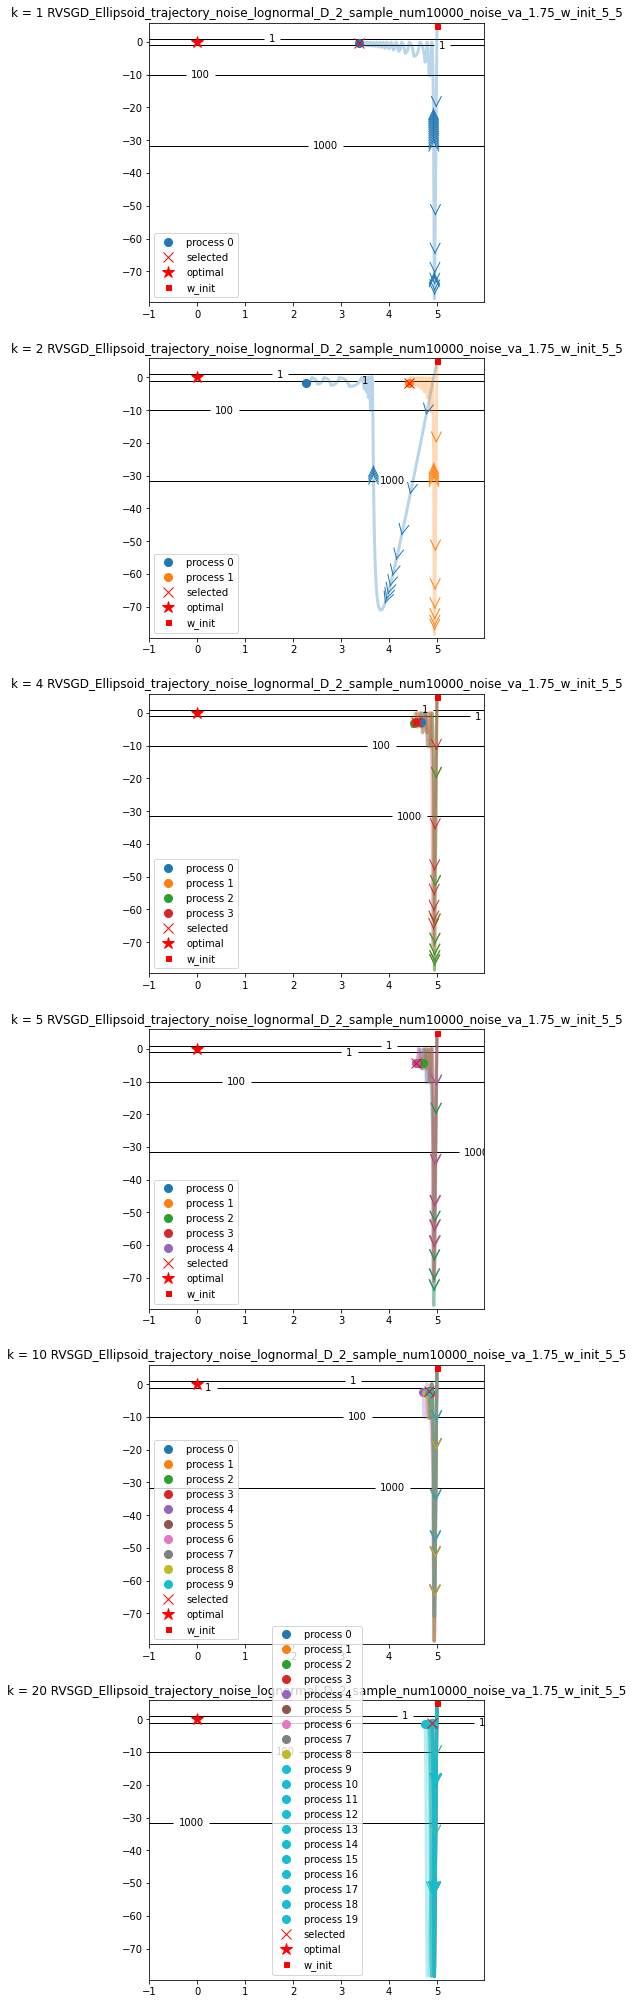

In [33]:
w_init = np.array([5, 5])

title = f"RVSGD_Ellipsoid_trajectory_noise_{noise}_D_{d}_sample_num{n}_noise_va_{E_var}_w_init_{w_init[0]}_{w_init[1]}"
RV = RV_SGDAve.RVSGDByW(model_opt=son, c=1, n=n, lr=lr)
k_core_list, k_selected_index, k_w_rv = RV.k_all_transition(k_list=k_list, w_init=w_init)
k_core_list_ave = k_sgd_to_ave(k_core_list)
plot_set.multiple_w_value_2d_k_candidates_contour(k_list=k_list, k_list_core_store=k_core_list_ave, _t_max=n,
                                                  k_selected_index=k_selected_index, f=son, levels=[1,100,1000,10000,100000],title=title,saving_png=False)



In [26]:
foo = k_sgd_to_ave(k_core_list)

(5000, 2)
(2500, 2)
(2500, 2)
(1250, 2)
(1250, 2)
(1250, 2)
(1250, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(500, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)
(250, 2)


In [ ]:
foo

In [25]:

k_core_list[0][0]

In [21]:
np.array(sgd_to_ave(k_core_list[0][0]))

array([[  5.        ,   5.        ],
       [  4.99992556,   4.94998498],
       [  4.96590786, -27.74750549],
       ...,
       [  3.32783629,  -0.1881656 ],
       [  3.32760742,  -0.20438222],
       [  3.32737864,  -0.22026733]])

In [71]:

np.mean(k_core_list[0],axis=1)

array([[ 3.37942866, -0.18184752]])

In [11]:
hoge = np.arange(24).reshape((2,3,4))

In [14]:
np.mean(hoge,axis=0)


array([[ 1.5,  5.5,  9.5],
       [13.5, 17.5, 21.5]])